<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

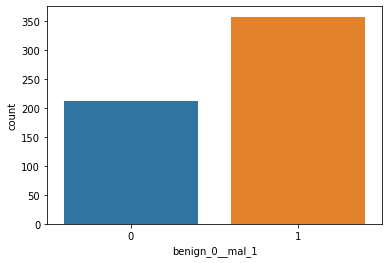

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

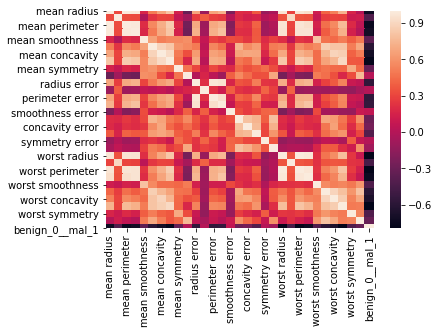

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

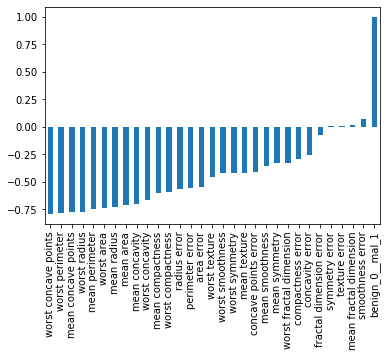

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

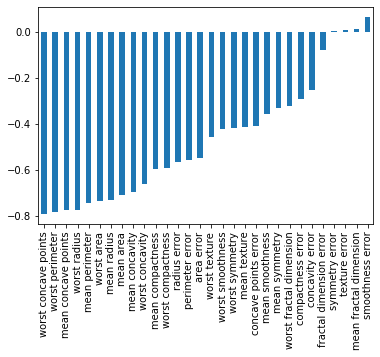

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [21]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6669 - val_loss: 0.6593
Epoch 2/600
426/426 [==============================] - 0s 152us/sample - loss: 0.6383 - val_loss: 0.6269
Epoch 3/600
426/426 [==============================] - 0s 147us/sample - loss: 0.6057 - val_loss: 0.5956
Epoch 4/600
426/426 [==============================] - 0s 162us/sample - loss: 0.5740 - val_loss: 0.5648
Epoch 5/600
426/426 [==============================] - 0s 178us/sample - loss: 0.5448 - val_loss: 0.5318
Epoch 6/600
426/426 [==============================] - 0s 192us/sample - loss: 0.5101 - val_loss: 0.4989
Epoch 7/600
426/426 [==============================] - 0s 220us/sample - loss: 0.4782 - val_loss: 0.4633
Epoch 8/600
426/426 [==============================] - 0s 133us/sample - loss: 0.4444 - val_loss: 0.4269
Epoch 9/600
426/426 [==============================] - 0s 131us/sample - loss: 0.4102 - val_loss: 0.3916
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0610 - val_loss: 0.1128
Epoch 79/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0644 - val_loss: 0.1091
Epoch 80/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0620 - val_loss: 0.1249
Epoch 81/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0610 - val_loss: 0.1112
Epoch 82/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0597 - val_loss: 0.1132
Epoch 83/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0595 - val_loss: 0.1167
Epoch 84/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0591 - val_loss: 0.1185
Epoch 85/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0583 - val_loss: 0.1134
Epoch 86/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0577 - val_loss: 0.1176
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0488 - val_loss: 0.1273
Epoch 156/600
426/426 [==============================] - 0s 220us/sample - loss: 0.0471 - val_loss: 0.1328
Epoch 157/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0479 - val_loss: 0.1346
Epoch 158/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0471 - val_loss: 0.1352
Epoch 159/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0466 - val_loss: 0.1285
Epoch 160/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0552 - val_loss: 0.1334
Epoch 161/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0546 - val_loss: 0.1346
Epoch 162/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0455 - val_loss: 0.1236
Epoch 163/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0512 - val_loss: 0.1317
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 169us/sample - loss: 0.0391 - val_loss: 0.1549
Epoch 232/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0419 - val_loss: 0.1438
Epoch 233/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0412 - val_loss: 0.1484
Epoch 234/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0397 - val_loss: 0.1479
Epoch 235/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0395 - val_loss: 0.1485
Epoch 236/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0390 - val_loss: 0.1531
Epoch 237/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0392 - val_loss: 0.1517
Epoch 238/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0402 - val_loss: 0.1522
Epoch 239/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0408 - val_loss: 0.1534
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 121us/sample - loss: 0.0341 - val_loss: 0.1676
Epoch 308/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0360 - val_loss: 0.1633
Epoch 309/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0350 - val_loss: 0.1595
Epoch 310/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0384 - val_loss: 0.1708
Epoch 311/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0391 - val_loss: 0.1647
Epoch 312/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0355 - val_loss: 0.1578
Epoch 313/600
426/426 [==============================] - 0s 149us/sample - loss: 0.0368 - val_loss: 0.1691
Epoch 314/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0341 - val_loss: 0.1600
Epoch 315/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0386 - val_loss: 0.1755
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 127us/sample - loss: 0.0283 - val_loss: 0.1810
Epoch 384/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0283 - val_loss: 0.1820
Epoch 385/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0280 - val_loss: 0.1875
Epoch 386/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0284 - val_loss: 0.1760
Epoch 387/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0298 - val_loss: 0.1812
Epoch 388/600
426/426 [==============================] - 0s 199us/sample - loss: 0.0285 - val_loss: 0.1811
Epoch 389/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0285 - val_loss: 0.1936
Epoch 390/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0282 - val_loss: 0.1824
Epoch 391/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0287 - val_loss: 0.1968
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 141us/sample - loss: 0.0250 - val_loss: 0.2155
Epoch 460/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0247 - val_loss: 0.2046
Epoch 461/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0244 - val_loss: 0.1994
Epoch 462/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0245 - val_loss: 0.2075
Epoch 463/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0238 - val_loss: 0.2006
Epoch 464/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0251 - val_loss: 0.2104
Epoch 465/600
426/426 [==============================] - ETA: 0s - loss: 0.015 - 0s 141us/sample - loss: 0.0238 - val_loss: 0.2044
Epoch 466/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0237 - val_loss: 0.2081
Epoch 467/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0235 - val_loss: 0.2123
Epoch 468/600
426/426 [====

426/426 [==============================] - 0s 147us/sample - loss: 0.0205 - val_loss: 0.2348
Epoch 536/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0201 - val_loss: 0.2292
Epoch 537/600
426/426 [==============================] - 0s 197us/sample - loss: 0.0201 - val_loss: 0.2287
Epoch 538/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0212 - val_loss: 0.2222
Epoch 539/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0200 - val_loss: 0.2345
Epoch 540/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0202 - val_loss: 0.2247
Epoch 541/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0203 - val_loss: 0.2189
Epoch 542/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0190 - val_loss: 0.2437
Epoch 543/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0204 - val_loss: 0.2270
Epoch 544/600
426/426 [============================

In [22]:
model.history.history

{'loss': [0.6668525892244258,
  0.6383407969430019,
  0.605747037930108,
  0.5739948869870862,
  0.5448468319127258,
  0.5100988924783161,
  0.47818617753579584,
  0.44439191997331073,
  0.41020091850432994,
  0.3778101422697166,
  0.34649701605380423,
  0.3194262837300278,
  0.29483732595130313,
  0.27595814376929556,
  0.25832570067873584,
  0.24405190145745523,
  0.2286688441961584,
  0.21643681824207306,
  0.20810197381206522,
  0.1960950503256959,
  0.19072292094499294,
  0.17771642707603078,
  0.17025456112315399,
  0.16270094228462434,
  0.15848557762976542,
  0.15023455030761415,
  0.14283293345724474,
  0.14009436926511531,
  0.13319384645967977,
  0.13190212999711015,
  0.12817604619432504,
  0.12233146675315822,
  0.11615258675645775,
  0.11352507637140337,
  0.11147902349770909,
  0.10984380634178019,
  0.1024981763021487,
  0.10056679569919344,
  0.09657991474643,
  0.09435917937279867,
  0.09295865050363988,
  0.08981852176568597,
  0.08959140103887504,
  0.08714635925533

In [23]:
model_loss = pd.DataFrame(model.history.history)

In [24]:
 model_loss

,loss,val_loss
0,0.666853,0.659305
1,0.638341,0.626882
2,0.605747,0.595628
3,0.573995,0.564806
4,0.544847,0.531774
...,...,...
595,0.018687,0.281091
596,0.019985,0.259751
597,0.018775,0.244591
598,0.018159,0.272461


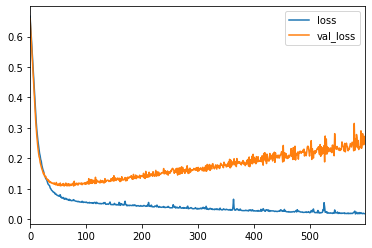

In [25]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [26]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6612 - val_loss: 0.6440
Epoch 2/600
426/426 [==============================] - 0s 143us/sample - loss: 0.6239 - val_loss: 0.6034
Epoch 3/600
426/426 [==============================] - 0s 152us/sample - loss: 0.5802 - val_loss: 0.5559
Epoch 4/600
426/426 [==============================] - 0s 150us/sample - loss: 0.5336 - val_loss: 0.5081
Epoch 5/600
426/426 [==============================] - 0s 148us/sample - loss: 0.4851 - val_loss: 0.4586
Epoch 6/600
426/426 [==============================] - 0s 163us/sample - loss: 0.4351 - val_loss: 0.4074
Epoch 7/600
426/426 [==============================] - 0s 136us/sample - loss: 0.3842 - val_loss: 0.3514
Epoch 8/600
426/426 [==============================] - 0s 143us/sample - loss: 0.3362 - val_loss: 0.3127
Epoch 9/600
426/426 [==============================] - 0s 141us/sample - loss: 0.3020 - val_loss: 0.2801
Epoch 10/60

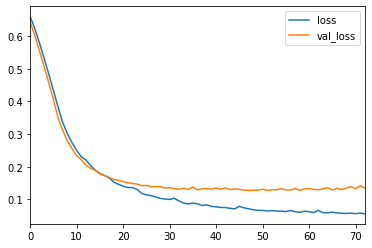

In [30]:
model.history.history
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.7268 - val_loss: 0.6983
Epoch 2/600
426/426 [==============================] - 0s 232us/sample - loss: 0.7079 - val_loss: 0.6742
Epoch 3/600
426/426 [==============================] - 0s 258us/sample - loss: 0.6850 - val_loss: 0.6530
Epoch 4/600
426/426 [==============================] - 0s 258us/sample - loss: 0.6630 - val_loss: 0.6393
Epoch 5/600
426/426 [==============================] - 0s 222us/sample - loss: 0.6496 - val_loss: 0.6229
Epoch 6/600
426/426 [==============================] - 0s 136us/sample - loss: 0.6289 - val_loss: 0.5998
Epoch 7/600
426/426 [==============================] - 0s 140us/sample - loss: 0.6397 - val_loss: 0.5728
Epoch 8/600
426/426 [==============================] - 0s 152us/sample - loss: 0.5780 - val_loss: 0.5455
Epoch 9/600
426/426 [==============================] - 0s 150us/sample - loss: 0.5999 - val_loss: 0.5286
Epoch 10/60

426/426 [==============================] - 0s 166us/sample - loss: 0.1378 - val_loss: 0.0960
Epoch 78/600
426/426 [==============================] - 0s 157us/sample - loss: 0.1334 - val_loss: 0.0941
Epoch 79/600
426/426 [==============================] - 0s 145us/sample - loss: 0.1711 - val_loss: 0.1057
Epoch 80/600
426/426 [==============================] - 0s 150us/sample - loss: 0.1378 - val_loss: 0.0942
Epoch 81/600
426/426 [==============================] - 0s 143us/sample - loss: 0.1444 - val_loss: 0.0919
Epoch 82/600
426/426 [==============================] - 0s 147us/sample - loss: 0.1216 - val_loss: 0.0918
Epoch 83/600
426/426 [==============================] - 0s 143us/sample - loss: 0.1155 - val_loss: 0.0899
Epoch 84/600
426/426 [==============================] - 0s 159us/sample - loss: 0.1281 - val_loss: 0.0915
Epoch 85/600
426/426 [==============================] - 0s 164us/sample - loss: 0.1440 - val_loss: 0.0915
Epoch 86/600
426/426 [==============================] - 0s 

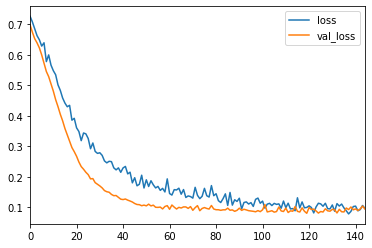

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [35]:
predictions = model.predict_classes(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [38]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
